In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib.pyplot import xlabel, ylabel, title, clim, show
import numpy as np


ImportError: cannot import name 'axes' from 'matplotlib' (c:\Users\analu\anaconda3\Lib\site-packages\matplotlib\__init__.py)

In [ ]:
metricas = pd.read_csv('metricasExpBH.csv')
metricas.head()

,Unnamed: 0,experimento,api,media,mediana,desvio_padrao,media_aparada,taxa_resposta,taxa_acerto
0,0,geoGoldBHexp1,MapBox,1.539552,0.000046,10.912322,0.511817,1.0000,0.8506
1,1,geoGoldBHexp1,Google,2.284151,0.008843,5.067888,1.541325,0.9992,0.7272
2,2,geoGoldBHexp1,TomTom,9.638626,0.097375,54.293889,2.383578,1.0000,0.5280
3,3,geoGoldBHexp1,OpenRouteService,5.443245,6.606720,4.669510,5.259343,0.9992,0.2646
4,4,geoGoldBHexp3,MapBox,1.985113,0.000046,12.479481,0.880777,1.0000,0.8246


In [ ]:
def determinar_falha(erro):
    if erro <= 0.15:
        return 0.0
    else:
        return 1.0

In [ ]:
shapefile_path = 'https://github.com/rcpsilva/UncertaintyQuantificationForGeocodingServices/raw/main/PaperGeoinfo/results/SMunicipios_2022/MG_Municipios_2022.shp'
gdf = gpd.read_file(shapefile_path)
city_name = "Belo Horizonte"  # Replace with the actual city name you want to plot
city_gdf = gdf[gdf['NM_MUN'] == city_name]

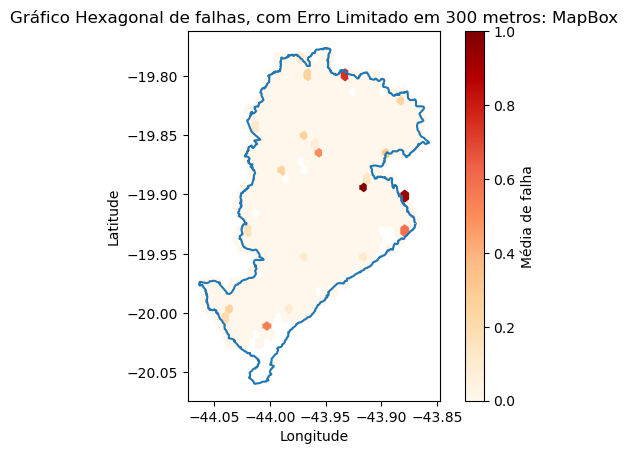

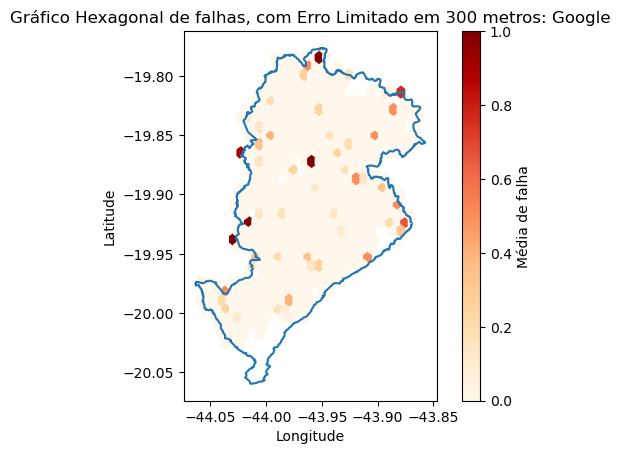

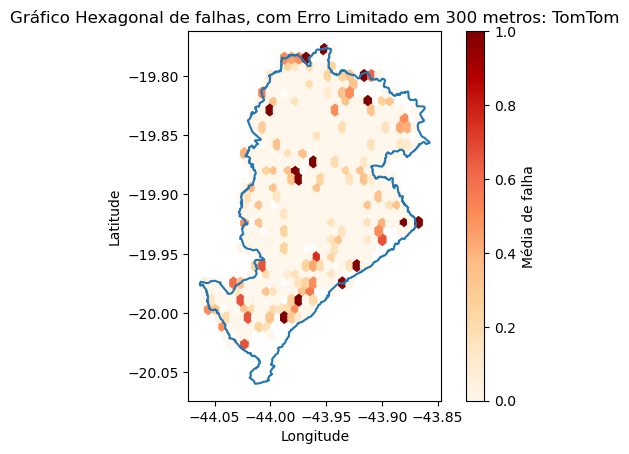

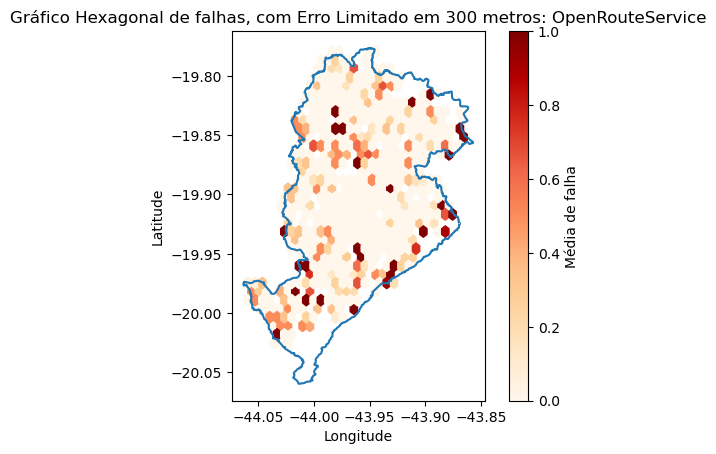

In [ ]:
nome_apis = ['MapBox','Google', 'TomTom', 'OpenRouteService']
limite = 0.3
gridsize = 30

for api in nome_apis:
    filtro_api = metricas['api'] == api

    indice_max_taxa_acerto = metricas[filtro_api]['taxa_acerto'].idxmax()
    nome_arquivo_max = metricas.loc[indice_max_taxa_acerto, 'experimento']
    df_max = pd.read_csv(f'{nome_arquivo_max}_erro.csv')
    df_max = df_max[df_max['geoapi_id'] == api]
    #df = df[df['erro'] <= limite]
    falha =  df_max['erro'].apply(determinar_falha)
    df_max['falha'] = falha

    city_gdf.boundary.plot()
    hb = plt.hexbin(df_max['LATITUDE'], df_max['LONGITUDE'], C=df_max['falha'], gridsize=gridsize, cmap='OrRd',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de falha')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    #plt.title(f'Gráfico Hexagonal de falhas, com Erro Limitado em 300 metros: {api}')
    plt.title(f'Gráfico Hexagonal de falhas para a maior taxa de acerto: {api}')
    plt.clim(vmin=0, vmax=1)
    plt.show()

    
    indice_min_taxa_acerto = metricas[filtro_api]['taxa_acerto'].idxmin()
    nome_arquivo_min = metricas.loc[indice_max_taxa_acerto, 'experimento']
    df_min = pd.read_csv(f'{nome_arquivo_min}_erro.csv')
    df_min = df_min[df_min['geoapi_id'] == api]
    falha =  df_min['erro'].apply(determinar_falha)
    df_min['falha'] = falha
    
    city_gdf.boundary.plot()
    hb = plt.hexbin(df_min['LATITUDE'], df_min['LONGITUDE'], C=df_min['falha'], gridsize=gridsize, cmap='OrRd',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de falha')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    #plt.title(f'Gráfico Hexagonal de falhas, com Erro Limitado em 300 metros: {api}')
    plt.title(f'Gráfico Hexagonal de falhas para a menor taxa de acerto: {api}')
    plt.clim(vmin=0, vmax=1)
    plt.show()
    #print(df.head())
    